##Project 1 - Group 11

Aditya Mohan Kakde, Venkata Subrahmanya Ankit Vennelakanti, Venkata Krishnan Ravichandran

Task 1 - K-means and Hierarchical Clustering methods 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/'

 Data1.csv   Data3.csv	 Data5.csv   Data7.csv	'World Indicators.csv'
 Data2.csv   Data4.csv	 Data6.csv   Data8.csv


## Data 1

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data1.csv')
df_1 = df_1.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_1.loc[df_1['Class']==1,'Class'] = 0
df_1.loc[df_1['Class']==2,'Class'] = 1
df_1.loc[df_1['Class']==3,'Class'] = 2
df_1.loc[df_1['Class']==4,'Class'] = 3
df_1.loc[df_1['Class']==5,'Class'] = 4
df_1.loc[df_1['Class']==6,'Class'] = 5
df_1.loc[df_1['Class']==7,'Class'] = 6
df_1

,X1,X2,X3,Class
0,-0.063274,0.027734,0.022683,0
1,-0.000731,0.048211,0.069198,0
2,-0.060767,-0.009080,0.053085,0
3,0.013252,-0.011876,0.055324,0
4,-0.054508,-0.003813,0.001738,0
...,...,...,...,...
207,0.175738,-0.053478,-2.733752,6
208,0.396046,-0.858377,-3.126866,6
209,-0.406362,-0.334541,-2.885598,6
210,-0.299275,0.071281,-3.642585,6


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

km = KMeans(n_clusters=7,random_state=10)
km.fit_predict(df_1)
print(km.labels_)
print("\n")

#External Validation for K-Means

print("Accuracy Score :",accuracy_score(df_1['Class'],km.labels_))
print("F1 Score :", f1_score(df_1['Class'], km.labels_, average="macro"))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Accuracy Score : 0.1509433962264151
F1 Score : 0.14285714285714285


Hierarchial Clustering

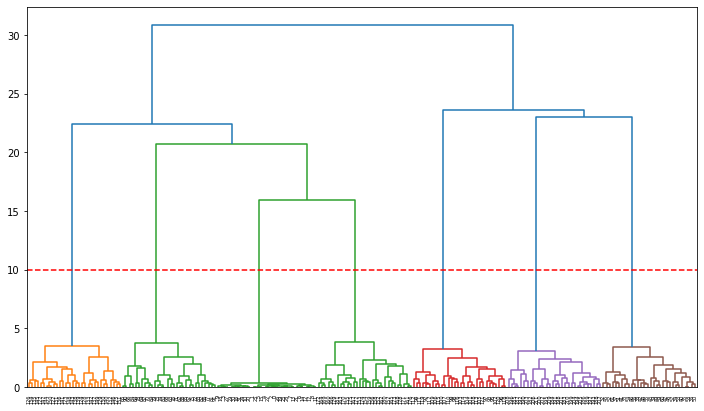

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_1)
mdlh.labels_

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
dend = shc.dendrogram(shc.linkage(df_1.iloc[:,0:3], method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation

In [ ]:
#Accuracy and F1 Score for Hierarchial Clustering
print("\n")
print("Accuracy Score :",accuracy_score(df_1['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_1['Class'], mdlh.labels_, average="macro"))



Accuracy Score : 0.14150943396226415
F1 Score : 0.05639097744360901


In [ ]:
# 3D Visual of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_1, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of Original Class
import plotly.express as px
plot = px.scatter_3d(df_1, x='X1', y='X2', z='X3', color='Class')
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.

## Data 2

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data2.csv')
df_2 = df_2.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_2.loc[df_2['Class']==1,'Class'] = 0
df_2.loc[df_2['Class']==2,'Class'] = 1
df_2.loc[df_2['Class']==3,'Class'] = 2
df_2.loc[df_2['Class']==4,'Class'] = 3
df_2


,X,Y,C,Class
0,3.277701,0.814082,0.326574,0
1,0.387577,0.176780,0.888046,0
2,0.268546,0.582963,0.080981,0
3,2.031145,0.244597,0.643921,0
4,0.188677,0.461280,0.496633,0
...,...,...,...,...
399,3.248655,2.297291,3.388138,2
400,4.100000,5.100000,0.504558,3
401,3.900000,4.900000,0.941634,3
402,4.000000,5.000000,0.702123,3


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

# Kmeans clustering model

km = KMeans(n_clusters=4,random_state=10)
km.fit_predict(df_2)
print(km.labels_)
print("\n")
#External Validation for K-Means Clustering
print("Accuracy Score :",accuracy_score(df_2['Class'],km.labels_))
print("F1 Score :", f1_score(df_2['Class'], km.labels_, average="macro"))


[1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3
 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0
 3 0 0 3 3 3 0 0 0 3 0 3 3 3 3 3 3 3 0 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 0 3 3
 3 0 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Accuracy Score : 0.5371287128712872
F1 Score : 0.4181749622926093


Hierarchial Clustering

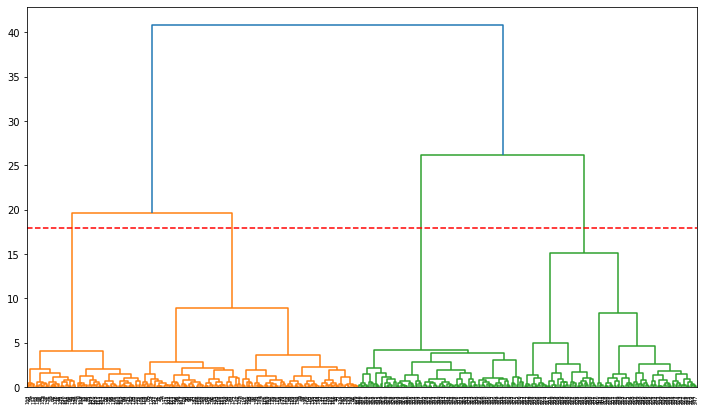

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_2)
mdlh.labels_

Z2 = AgglomerativeClustering(n_clusters=4, linkage='ward')
dend = shc.dendrogram(shc.linkage(df_2.iloc[:,0:3], method='ward'))
plt.axhline(y=18, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation

In [ ]:
#Accuracy and F1 Score for Hierarchial Clustering
print("Accuracy Score :",accuracy_score(df_2['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_2['Class'], mdlh.labels_, average="macro"))

Accuracy Score : 0.0
F1 Score : 0.0


In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_2, x="X", y='Y', z='C', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of defined clusters
import plotly.express as px
plot = px.scatter_3d(df_2, x='X', y='Y', z='C', color='Class')
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.

##Data 3

In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data3.csv')
df_3 = df_3.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_3.loc[df_3['Class']==1,'Class'] = 0
df_3.loc[df_3['Class']==2,'Class'] = 1
df_3.loc[df_3['Class']==3,'Class'] = 2
df_3.loc[df_3['Class']==4,'Class'] = 3
df_3

,X1,X2,X3,Class
0,1.295428,0.050829,-0.385217,0
1,1.409178,-0.035191,-0.251980,0
2,1.096803,0.246365,-0.415011,0
3,1.463328,0.265354,-0.513488,0
4,1.603284,0.080577,-0.470257,0
...,...,...,...,...
395,0.795695,0.209456,1.880609,3
396,0.653127,-0.703156,1.549448,3
397,-0.726249,-0.103244,0.694300,3
398,0.808596,-0.492640,1.649370,3


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

# Kmeans clustering model

km = KMeans(n_clusters=4,random_state=10)
km.fit_predict(df_3)
print(km.labels_)
print("\n")
#External Validation for K-Means Clustering
print("Accuracy Score :",accuracy_score(df_3['Class'],km.labels_))
print("F1 Score :", f1_score(df_3['Class'], km.labels_, average="macro"))


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Accuracy Score : 0.5
F1 Score : 0.5


Hierarchical Clustering

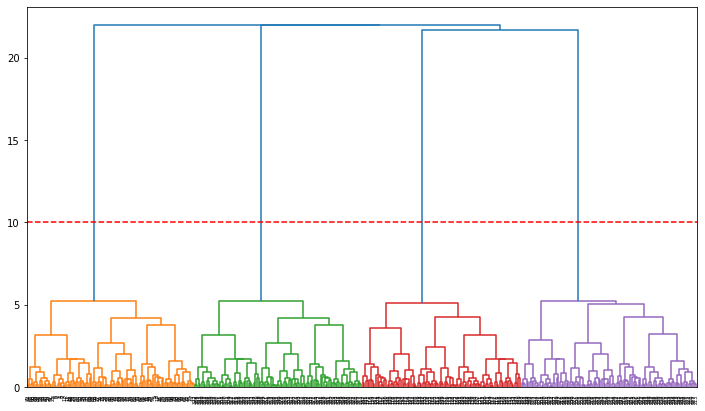

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_3)
mdlh.labels_


dend = shc.dendrogram(shc.linkage(df_3.iloc[:,0:3], method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation for Hierarchial Clustering

In [ ]:
print("Accuracy Score :",accuracy_score(df_3['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_3['Class'], mdlh.labels_, average="macro"))

Accuracy Score : 0.25
F1 Score : 0.16666666666666666


In [ ]:
# 3D visuals of defined clusters
import plotly.express as px
plot = px.scatter_3d(df_3, x='X1', y='X2', z='X3', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_3, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.

##Data 4

In [ ]:
df_4 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data4.csv')
df_4 = df_4.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_4.loc[df_4['Class']==1,'Class'] = 0
df_4.loc[df_4['Class']==2,'Class'] = 1

df_4

,X1,X2,X3,Class
0,-0.45300,-0.8910,0.02300,0
1,0.65300,-0.8460,0.02110,0
2,0.39800,0.9130,-0.00139,0
3,0.09520,1.0500,0.00628,0
4,0.52400,-0.9410,0.03780,0
...,...,...,...,...
995,0.01520,0.0531,-0.36100,1
996,0.05160,0.6910,0.87500,1
997,-0.00511,1.3900,-0.94700,1
998,-0.06710,0.7140,0.88100,1


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

# Kmeans clustering model

km = KMeans(n_clusters=2,random_state=200)
km.fit_predict(df_4)
print(km.labels_)
print("\n")
#External Validation for K-Means Clustering

print("Accuracy Score :",accuracy_score(df_4['Class'],km.labels_))
print("F1 Score :", f1_score(df_4['Class'], km.labels_, average="macro"))


[1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 

Hierarchical Clustering

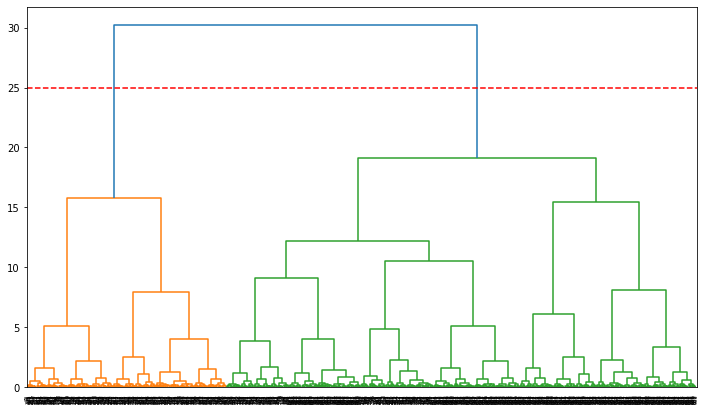

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_4)
mdlh.labels_

dend = shc.dendrogram(shc.linkage(df_4.iloc[:,0:3], method='ward'))
plt.axhline(y=25, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation for Hierarchial Clustering

In [ ]:
print("Accuracy Score :",accuracy_score(df_4['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_4['Class'], mdlh.labels_, average="macro"))

Accuracy Score : 0.201
F1 Score : 0.16736053288925895


In [ ]:
 # 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_4, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of Original Data
import plotly.express as px
plot = px.scatter_3d(df_4, x='X1', y='X2', z='X3', color='Class')
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.

##Data 5

In [ ]:
df_5 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data5.csv')
df_5 = df_5.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_5.loc[df_5['Class']==1,'Class'] = 0
df_5.loc[df_5['Class']==2,'Class'] = 1

df_5

,X1,X2,X3,Class
0,-4.822490,-50.402170,4.020861,0
1,-44.460120,20.964670,-11.492060,0
2,50.001020,0.780748,9.134460,0
3,-41.699080,-22.310060,16.314120,0
4,4.425242,-4.666664,50.223740,0
...,...,...,...,...
795,-1.531027,0.681636,0.543271,1
796,0.500754,-1.848209,0.605654,1
797,1.089574,-0.246493,-3.355758,1
798,-1.907717,4.964502,2.098423,1


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

km = KMeans(n_clusters=2,random_state=10)
km.fit_predict(df_5.iloc[:,1:4])
print(km.labels_)
print("\n")

#External Validation for K-Means Clustering
print("Accuracy Score :",accuracy_score(df_5['Class'],km.labels_))
print("F1 Score :", f1_score(df_5['Class'], km.labels_, average="macro"))


[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Hierarchial Clustering

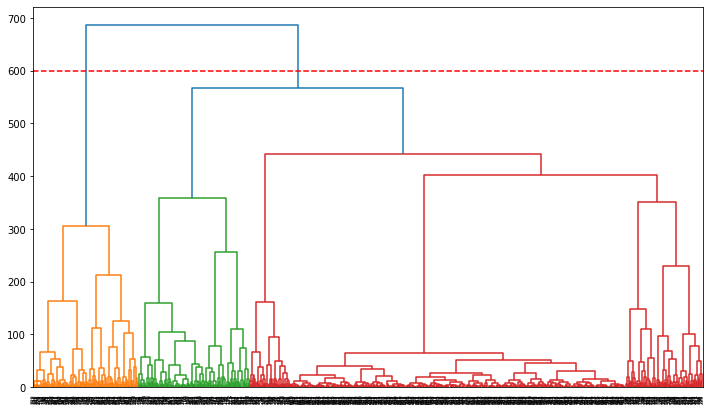

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_5)
mdlh.labels_


dend = shc.dendrogram(shc.linkage(df_5.iloc[:,0:3], method='ward'))
plt.axhline(y=600, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation for Hierarchial Clustering

In [ ]:
print("Accuracy Score :",accuracy_score(df_5['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_5['Class'], mdlh.labels_, average="macro"))

Accuracy Score : 0.3425
F1 Score : 0.25512104283054005


In [ ]:
# 3D visuals of Original given data in clusters
import plotly.express as px
plot = px.scatter_3d(df_5, x='X1', y='X2', z='X3', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_5, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.

##Data 6

In [ ]:
df_6 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data6.csv')
df_6 = df_6.drop('Unnamed: 0', axis=1)
#df_6

In [ ]:
# Convert the labels of the defined classes from 1-2 to 0-1 as model prediction is between 0-6
df_6.loc[df_6['Class']==1,'Class'] = 0
df_6.loc[df_6['Class']==2,'Class'] = 1
df_6

,X1,X2,Class
0,1.388261,2.076096,0
1,2.177247,3.102304,0
2,0.378645,5.307610,0
3,3.681732,1.622681,0
4,2.462861,2.777897,0
...,...,...,...
4091,0.909687,0.375763,1
4092,2.698381,0.511262,1
4093,1.078797,1.526153,1
4094,1.974889,-0.649343,1


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

# Kmeans clustering model
km = KMeans(n_clusters=2,random_state=10)
km.fit_predict(df_6)
print(km.labels_)

# External Validation for K-Means Clustering
print("Accuracy Score :",accuracy_score(df_6['Class'],km.labels_))
print("F1 Score :", f1_score(df_6['Class'], km.labels_, average="macro"))


[1 1 1 ... 0 0 0]


Accuracy Score : 0.03369140625
F1 Score : 0.03322464940906844


Hierarchial Clustering

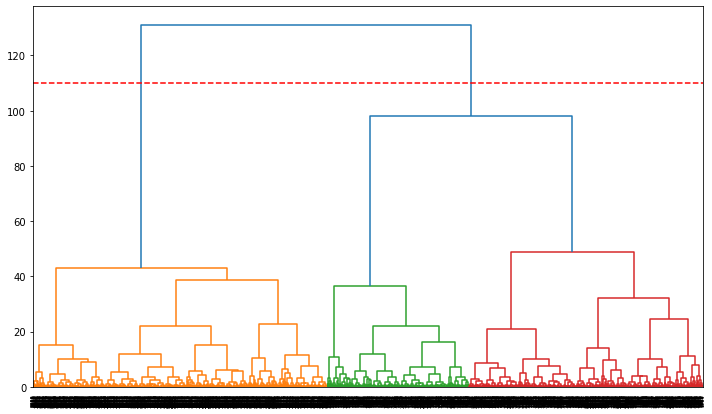

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_6)
mdlh.labels_


dend = shc.dendrogram(shc.linkage(df_6.iloc[:,0:2], method='ward'))
plt.axhline(y=110, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation for Hierarchial Clustering

In [ ]:
print("Accuracy Score :",accuracy_score(df_6['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_6['Class'], mdlh.labels_, average="macro"))



Accuracy Score : 0.994873046875
F1 Score : 0.9948729585579053


In [ ]:
# 3D visuals of Original Class
import plotly.express as px
plot = px.scatter(df_6, x='X1', y='X2', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter(df_6, x='X1', y='X2', color=km.labels_)
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.

##Data 7

In [ ]:
df_7 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data7.csv')
df_7 = df_7.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_7.loc[df_7['Class']==1,'Class'] = 0
df_7.loc[df_7['Class']==2,'Class'] = 1
df_7.loc[df_7['Class']==3,'Class'] = 2
df_7.loc[df_7['Class']==4,'Class'] = 3
df_7.loc[df_7['Class']==5,'Class'] = 4
df_7.loc[df_7['Class']==6,'Class'] = 5

df_7

,X1,X2,Class
0,-3.000000,-3.000000,4
1,-3.000000,3.000000,3
2,3.000000,-3.000000,5
3,3.000000,3.000000,2
4,-0.417091,0.114782,0
...,...,...,...
765,-1.604434,-1.118861,1
766,-3.050000,-3.050000,4
767,-3.050000,2.950000,3
768,2.950000,-3.050000,5


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score


# Kmeans clustering model
km = KMeans(n_clusters=6,random_state=10)
km.fit_predict(df_7)
print(km.labels_)

#External Validation for K-Means Clustering
print("Accuracy Score :",accuracy_score(df_7['Class'],km.labels_))
print("F1 Score :", f1_score(df_7['Class'], km.labels_, average="macro"))

[3 2 4 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 2 4 1 3 2 3 0
 3 2 3 0 3 0 3 0 2 0 2 3 2 3 0 2 2 2 1 2 0 2 2 1 2 0 3 2 2 0 0 2 3 2 1 3 2
 0 3 1 3 0 0 2 1 0 1 0 1 0 2 2 1 1 1 3 0 3 0 3 1 0 2 3 1 0 1 1 3 0 1 2 2 2
 3 2 2 0 2 2 2 2 1 2 0 2 

Hierarchial Clustering

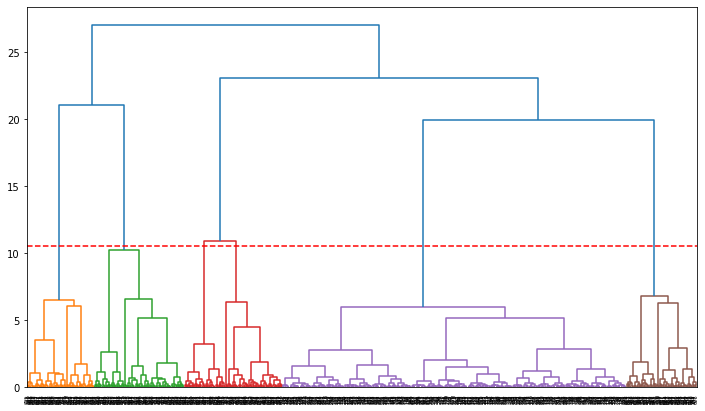

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_7)
mdlh.labels_


dend = shc.dendrogram(shc.linkage(df_7.iloc[:,0:2], method='ward'))
plt.axhline(y=10.5, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation for Hierarchial Clustering

In [ ]:

print("Accuracy Score :",accuracy_score(df_7['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_7['Class'], mdlh.labels_, average="macro"))



Accuracy Score : 0.7402597402597403
F1 Score : 0.2410379802327435


In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter(df_7, x='X1', y='X2', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of Original Class
import plotly.express as px
plot = px.scatter(df_7, x='X1', y='X2', color='Class')
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.

##Data 8

In [ ]:
df_8 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data8.csv')
df_8 = df_8.drop('Unnamed: 0', axis=1)

In [ ]:
df_8.loc[df_8['Class']==1,'Class'] = 0
df_8

,X1,X2,X3,Class
0,0.000000,0.000000,1.00000,0
1,0.000000,0.052336,0.99863,0
2,0.049774,0.016173,0.99863,0
3,0.030762,-0.042341,0.99863,0
4,-0.030762,-0.042341,0.99863,0
...,...,...,...,...
3997,0.049774,-0.016173,-0.99863,0
3998,0.000000,-0.052336,-0.99863,0
3999,-0.049774,-0.016173,-0.99863,0
4000,-0.030762,0.042341,-0.99863,0


K-Means Cluestering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

km = KMeans(n_clusters=1,random_state=10)
km.fit_predict(df_8)

print(km.labels_)
print("\n")
print("Accuracy Score :",accuracy_score(df_8['Class'],km.labels_))
print("F1 Score :", f1_score(df_8['Class'], km.labels_, average="macro"))

[0 0 0 ... 0 0 0]


Accuracy Score : 1.0
F1 Score : 1.0


Hierarchial Clustering

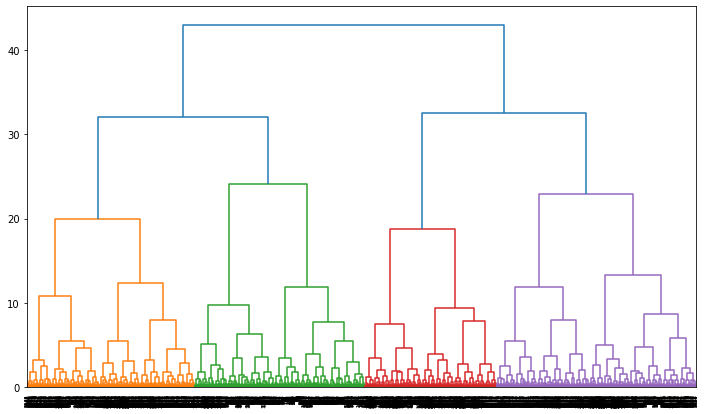

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_8)
mdlh.labels_


dend = shc.dendrogram(shc.linkage(df_8.iloc[:,0:3], method='ward'))
plt.axhline(y=50, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

External Validation for Hierarchial Clustering

In [ ]:
print("\n")
print("Accuracy Score :",accuracy_score(df_8['Class'],mdlh.labels_))
print("F1 Score :", f1_score(df_8['Class'], mdlh.labels_, average="macro"))



Accuracy Score : 0.4947526236881559
F1 Score : 0.33099297893681046


In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_8, x='X1', y='X2', z='X3', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_8, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

Since the predicted class lables keep varying, Accuracy and F1 Score cannot be reported with high confidence and might be a misrepresentation.